In [17]:
# Import pandas for data handling
import pandas as pd

# Import numpy for mathematical operations
import numpy as np

# Import function to split the dataset
from sklearn.model_selection import train_test_split

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import seaborn for advanced visualization
import seaborn as sns

In [28]:
# -----------------------------------------------------
# Load the dataset
# -----------------------------------------------------
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "iphone_purchase_records.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "piyushborhade/knn-algorithms",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_29160\1026726930.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [19]:
# -----------------------------------------------------
# Check for missing values
# -----------------------------------------------------
print("Null values in each column:")   # Print a message
print(df.isnull().sum())               # Display missing values count for each column

Null values in each column:
Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64


In [20]:
# -----------------------------------------------------
# Select features (X) and target (y)
# -----------------------------------------------------
X = df[['Age', 'Salary']]             # Select input features
y = df['Purchase Iphone']              # Select target column

In [21]:
# -----------------------------------------------------
# Split the data into training and testing sets
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)                                       # 80% training, 20% testing

In [22]:
# -----------------------------------------------------
# Feature Scaling using StandardScaler
# -----------------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()               # Create the scaler object
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform testing data only


In [23]:
# -----------------------------------------------------
# Train KNN Model
# -----------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # Create KNN model with K = 5
knn.fit(X_train, y_train)                  # Train the model

KNeighborsClassifier()

In [24]:
# -----------------------------------------------------
# Make Predictions
# -----------------------------------------------------
y_pred = knn.predict(X_test)               # Predict the test data

# -----------------------------------------------------
# Evaluate the Model
# -----------------------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))   # Print model accuracy
print(confusion_matrix(y_test, y_pred))              # Print confusion matrix
print(classification_report(y_test, y_pred))         # Print precision, recall, F1-score


Accuracy: 0.9125
[[48  4]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



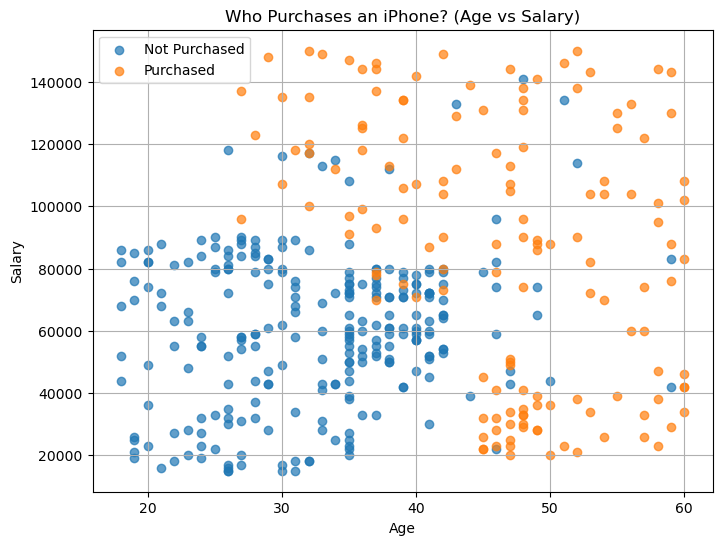

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for visualizing purchase behavior
plt.figure(figsize=(8, 6))

# Plot people who did NOT purchase
plt.scatter(
    df[df['Purchase Iphone'] == 0]['Age'],
    df[df['Purchase Iphone'] == 0]['Salary'],
    label='Not Purchased',
    alpha=0.7
)

# Plot people who DID purchase
plt.scatter(
    df[df['Purchase Iphone'] == 1]['Age'],
    df[df['Purchase Iphone'] == 1]['Salary'],
    label='Purchased',
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Who Purchases an iPhone? (Age vs Salary)")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_k = 1
best_accuracy = 0

#best k
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print("Best K:", best_k)
print("Best Accuracy:", best_accuracy)

Best K: 7
Best Accuracy: 0.9375
